In [5]:
import psycopg2 as pg2
import pandas as pd
import pprint


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
conn = pg2.connect(dbname='boardgames', user='postgres', host='localhost', port='5432', password='omgiroxkbye')
cur = conn.cursor()

In [3]:
cur.execute('Select * FROM "BoardGames" LIMIT 0')
colnames = [desc[0] for desc in cur.description]

In [4]:
colnames

['row_names',
 'game.id',
 'game.type',
 'details.description',
 'details.image',
 'details.maxplayers',
 'details.maxplaytime',
 'details.minage',
 'details.minplayers',
 'details.minplaytime',
 'details.name',
 'details.playingtime',
 'details.thumbnail',
 'details.yearpublished',
 'attributes.boardgameartist',
 'attributes.boardgamecategory',
 'attributes.boardgamecompilation',
 'attributes.boardgamedesigner',
 'attributes.boardgameexpansion',
 'attributes.boardgamefamily',
 'attributes.boardgameimplementation',
 'attributes.boardgameintegration',
 'attributes.boardgamemechanic',
 'attributes.boardgamepublisher',
 'attributes.total',
 'stats.average',
 'stats.averageweight',
 'stats.bayesaverage',
 'stats.family.abstracts.bayesaverage',
 'stats.family.abstracts.pos',
 'stats.family.cgs.bayesaverage',
 'stats.family.cgs.pos',
 'stats.family.childrensgames.bayesaverage',
 'stats.family.childrensgames.pos',
 'stats.family.familygames.bayesaverage',
 'stats.family.familygames.pos',
 'st

In [8]:
conn.commit()

In [10]:
query = '''SELECT *
FROM "BoardGames";'''
cur.execute(query)

In [11]:
bgdf = pd.DataFrame(cur.fetchall())

In [12]:
bgdf

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,11,boardgame,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7.0,45.0,13.0,2.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90395,90396,220053,boardgame,Soldier Ball is a tabletop skill and strategy ...,//cf.geekdo-images.com/images/pic3436079.jpg,2.0,15.0,4.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90396,90397,220055,boardgame,Description from the designer:&#10;&#10;The ye...,//cf.geekdo-images.com/images/pic3529002.jpg,4.0,45.0,14.0,2.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90397,90398,220068,boardgameexpansion,Cecrops founded Athens and judged a competitio...,//cf.geekdo-images.com/images/pic3503602.jpg,4.0,90.0,14.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90398,90399,220069,boardgameexpansion,"The famous Myrmidons are the army of Achilles,...",//cf.geekdo-images.com/images/pic3437871.jpg,4.0,90.0,14.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bgdf.columns = colnames

In [14]:
bgdf

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,11,boardgame,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7.0,45.0,13.0,2.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90395,90396,220053,boardgame,Soldier Ball is a tabletop skill and strategy ...,//cf.geekdo-images.com/images/pic3436079.jpg,2.0,15.0,4.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90396,90397,220055,boardgame,Description from the designer:&#10;&#10;The ye...,//cf.geekdo-images.com/images/pic3529002.jpg,4.0,45.0,14.0,2.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90397,90398,220068,boardgameexpansion,Cecrops founded Athens and judged a competitio...,//cf.geekdo-images.com/images/pic3503602.jpg,4.0,90.0,14.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90398,90399,220069,boardgameexpansion,"The famous Myrmidons are the army of Achilles,...",//cf.geekdo-images.com/images/pic3437871.jpg,4.0,90.0,14.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
bgdf.to_csv("data/boardgames.csv")

In [18]:
conn.commit()

In [19]:
query = '''SELECT *
FROM "BoardGames"
LIMIT 100;'''
cur.execute(query)

In [20]:
first100 = pd.DataFrame(cur.fetchall())

In [21]:
first100.columns = colnames

In [22]:
first100

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,...,None,None,None,None,None,None,None,None,None,None
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,...,None,None,None,None,None,None,None,None,None,None
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,...,None,None,None,None,None,None,None,None,None,None
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,...,None,None,None,None,None,None,None,None,None,None
4,11,11,boardgame,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7,45,13,2,45,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86,90,boardgame,Spewed out amidst the rest of the 'Phantom Men...,//cf.geekdo-images.com/images/pic192632.jpg,2,20,8,2,20,...,None,None,None,None,None,None,None,None,None,None
96,87,91,boardgame,(from GMT Games' website:)&#10;&#10;They calle...,//cf.geekdo-images.com/images/pic834645.jpg,2,480,14,2,480,...,None,None,None,None,None,None,None,None,None,None
97,88,93,boardgame,"In this award-winning game, players take on th...",//cf.geekdo-images.com/images/pic180538.jpg,5,120,12,2,60,...,None,None,None,None,None,None,None,None,None,None
98,108,114,boardgame,This game comes inside what looks like a video...,//cf.geekdo-images.com/images/pic236986.jpg,6,45,12,2,45,...,None,None,None,None,None,None,None,None,None,None


In [24]:
first100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_names                                 100 non-null    object 
 1   game.id                                   100 non-null    object 
 2   game.type                                 100 non-null    object 
 3   details.description                       100 non-null    object 
 4   details.image                             100 non-null    object 
 5   details.maxplayers                        100 non-null    int64  
 6   details.maxplaytime                       100 non-null    int64  
 7   details.minage                            100 non-null    int64  
 8   details.minplayers                        100 non-null    int64  
 9   details.minplaytime                       100 non-null    int64  
 10  details.name                           

In [43]:
#delete stats.family*, stats.subtype*, attributes.t columns

def cleandata(df):
    df.drop(list(df.filter(regex = 'stats.family*')), axis = 1, inplace = True)
    df.drop(list(df.filter(regex = 'stats.subtype*')), axis = 1, inplace = True)
    df.drop(list(df.filter(regex = 'attributes.t*')), axis = 1, inplace = True)
    df.drop(list(df.filter(items = 'row_names')), axis = 1, inplace = True)
    return df
    

In [44]:
first100.columns

Index(['game.id', 'game.type', 'details.description', 'details.image',
       'details.maxplayers', 'details.maxplaytime', 'details.minage',
       'details.minplayers', 'details.minplaytime', 'details.name',
       'details.playingtime', 'details.thumbnail', 'details.yearpublished',
       'stats.average', 'stats.averageweight', 'stats.bayesaverage',
       'stats.median', 'stats.numcomments', 'stats.numweights', 'stats.owned',
       'stats.stddev', 'stats.trading', 'stats.usersrated', 'stats.wanting',
       'stats.wishing', 'polls.language_dependence',
       'polls.suggested_numplayers.1', 'polls.suggested_numplayers.10',
       'polls.suggested_numplayers.2', 'polls.suggested_numplayers.3',
       'polls.suggested_numplayers.4', 'polls.suggested_numplayers.5',
       'polls.suggested_numplayers.6', 'polls.suggested_numplayers.7',
       'polls.suggested_numplayers.8', 'polls.suggested_numplayers.9',
       'polls.suggested_numplayers.Over', 'polls.suggested_playerage'],
      dty

In [40]:
first100.shape

(100, 38)

In [45]:
bgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 81 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_names                                 90400 non-null  object 
 1   game.id                                   90400 non-null  object 
 2   game.type                                 90400 non-null  object 
 3   details.description                       90400 non-null  object 
 4   details.image                             83508 non-null  object 
 5   details.maxplayers                        90397 non-null  float64
 6   details.maxplaytime                       90397 non-null  float64
 7   details.minage                            90397 non-null  float64
 8   details.minplayers                        90397 non-null  float64
 9   details.minplaytime                       90397 non-null  float64
 10  details.name                      

In [46]:
cleandata(bgdf)

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,...,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,...,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,14
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,...,NotRecommended,Recommended,Best,None,None,None,None,None,NotRecommended,None
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,...,Recommended,Best,Recommended,None,None,None,None,None,NotRecommended,10
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,...,Recommended,Best,Best,None,None,None,None,None,NotRecommended,14
4,11,11,boardgame,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7.0,45.0,13.0,2.0,45.0,...,NotRecommended,Recommended,Recommended,Best,Recommended,Recommended,None,None,NotRecommended,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90395,90396,220053,boardgame,Soldier Ball is a tabletop skill and strategy ...,//cf.geekdo-images.com/images/pic3436079.jpg,2.0,15.0,4.0,2.0,5.0,...,None,None,None,None,None,None,None,None,None,4
90396,90397,220055,boardgame,Description from the designer:&#10;&#10;The ye...,//cf.geekdo-images.com/images/pic3529002.jpg,4.0,45.0,14.0,2.0,30.0,...,None,None,None,None,None,None,None,None,None,None
90397,90398,220068,boardgameexpansion,Cecrops founded Athens and judged a competitio...,//cf.geekdo-images.com/images/pic3503602.jpg,4.0,90.0,14.0,1.0,45.0,...,None,None,None,None,None,None,None,None,None,None
90398,90399,220069,boardgameexpansion,"The famous Myrmidons are the army of Achilles,...",//cf.geekdo-images.com/images/pic3437871.jpg,4.0,90.0,14.0,1.0,45.0,...,None,None,None,None,None,None,None,None,None,None


In [47]:
bgdf.to_csv("data/clean_boardgames.csv")

In [49]:
first100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   game.id                          100 non-null    object 
 1   game.type                        100 non-null    object 
 2   details.description              100 non-null    object 
 3   details.image                    100 non-null    object 
 4   details.maxplayers               100 non-null    int64  
 5   details.maxplaytime              100 non-null    int64  
 6   details.minage                   100 non-null    int64  
 7   details.minplayers               100 non-null    int64  
 8   details.minplaytime              100 non-null    int64  
 9   details.name                     100 non-null    object 
 10  details.playingtime              100 non-null    int64  
 11  details.thumbnail                100 non-null    object 
 12  details.yearpublished  

In [6]:
bgdf = pd.read_csv('data/boardgames.csv', index_col=False)
first100 = bgdf[:100]

/home/zy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
first100

,Unnamed: 0,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11,11,boardgame,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7.0,45.0,13.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,86,90,boardgame,Spewed out amidst the rest of the 'Phantom Men...,//cf.geekdo-images.com/images/pic192632.jpg,2.0,20.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,87,91,boardgame,(from GMT Games' website:)&#10;&#10;They calle...,//cf.geekdo-images.com/images/pic834645.jpg,2.0,480.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,88,93,boardgame,"In this award-winning game, players take on th...",//cf.geekdo-images.com/images/pic180538.jpg,5.0,120.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,108,114,boardgame,This game comes inside what looks like a video...,//cf.geekdo-images.com/images/pic236986.jpg,6.0,45.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#delete columns not useful for analysis: details.image, details.thumbnail


def cleandata(df):
    numdf = df.copy()
    wordsdf = df[['game.id','details.name','details.description']]
    
    filters_ = ['stats.family*','stats.subtype*', 'attributes.t*','polls.*']
    col_to_drop = ['Unnamed: 0','game.id','row_names','details.image','details.thumbnail', 'details.name','details.description', 'game.type']
    
    for filter_ in filters_:
        numdf.drop(list(numdf.filter(regex = filter_)), axis = 1, inplace=True
                       )
    numdf.drop(col_to_drop, axis=1, inplace=True)
    
    return wordsdf, numdf
    

In [19]:
worddata, numdata = cleandata(bgdf)

In [21]:
graphdata=numdata.iloc[:,[5,0,8,11,16]]

AttributeError: 'function' object has no attribute 'ravel'

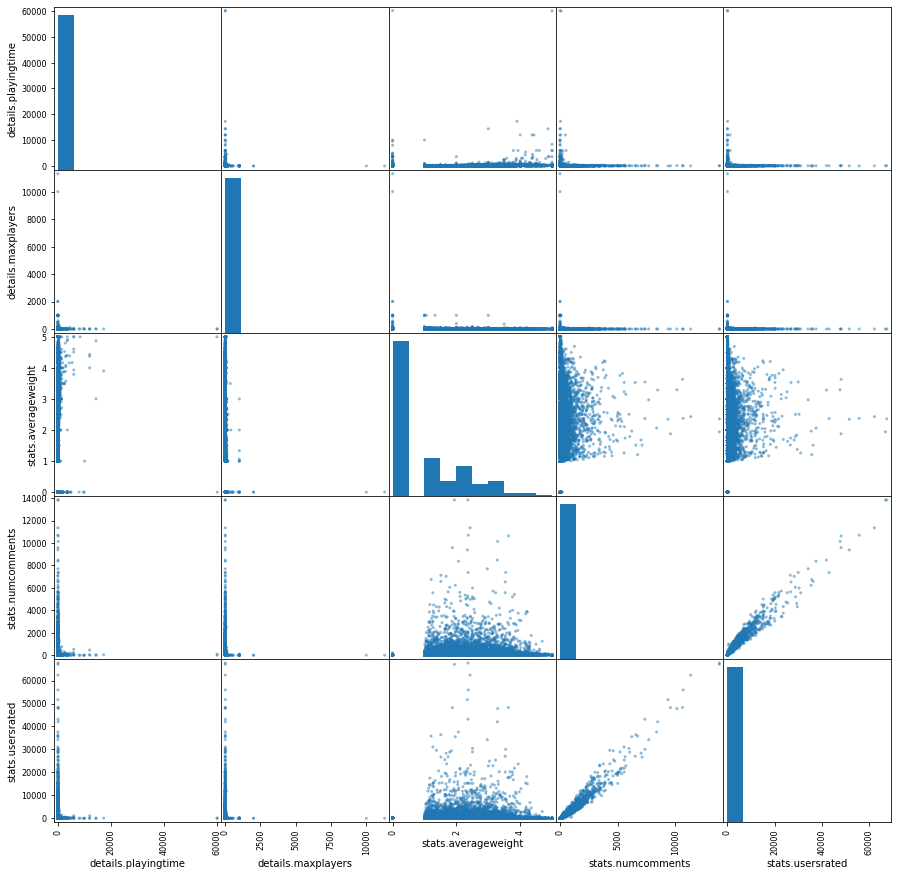

In [25]:
scatter_matrix(graphdata, figsize=(15,15));
plt.savefig('img/scatter.png')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

In [9]:
first100words,first100num = cleandata(first100)

In [27]:
first100num.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
details.maxplayers,5.00000,4.00000,4.00000,4.00000,7.00000,6.00000,6.00000,2.00000,5.00000,4.00000
details.maxplaytime,240.00000,30.00000,60.00000,60.00000,45.00000,90.00000,240.00000,20.00000,120.00000,90.00000
details.minage,14.00000,12.00000,10.00000,12.00000,13.00000,12.00000,12.00000,8.00000,12.00000,13.00000
details.minplayers,3.00000,3.00000,2.00000,2.00000,2.00000,3.00000,2.00000,2.00000,2.00000,2.00000
details.minplaytime,240.00000,30.00000,30.00000,60.00000,45.00000,90.00000,240.00000,20.00000,120.00000,90.00000
details.playingtime,240.00000,30.00000,60.00000,60.00000,45.00000,90.00000,240.00000,20.00000,120.00000,90.00000
details.yearpublished,1986.00000,1981.00000,1998.00000,1992.00000,1997.00000,1964.00000,1989.00000,1978.00000,1993.00000,1998.00000
stats.average,7.66508,6.60815,7.44119,6.60675,7.06751,7.35830,6.52534,6.50534,6.14538,6.51776
stats.averageweight,4.34770,1.94230,2.50850,2.66670,1.67770,2.50890,3.00000,1.82170,2.40000,3.19580
stats.bayesaverage,7.29168,5.87150,7.28295,5.76636,6.98280,7.21895,5.57250,6.21877,5.60857,6.07659


In [16]:
first100num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   details.maxplayers     100 non-null    float64
 1   details.maxplaytime    100 non-null    float64
 2   details.minage         100 non-null    float64
 3   details.minplayers     100 non-null    float64
 4   details.minplaytime    100 non-null    float64
 5   details.playingtime    100 non-null    float64
 6   details.yearpublished  100 non-null    float64
 7   stats.average          100 non-null    float64
 8   stats.averageweight    100 non-null    float64
 9   stats.bayesaverage     100 non-null    float64
 10  stats.median           100 non-null    float64
 11  stats.numcomments      100 non-null    float64
 12  stats.numweights       100 non-null    float64
 13  stats.owned            100 non-null    float64
 14  stats.stddev           100 non-null    float64
 15  stats.t

In [119]:
first100words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   details.name         100 non-null    object
 1   details.description  100 non-null    object
 2   game.type            100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
#select and plot: min players, min age, playing time, average, average weight, bayesaverage(?), 
#num comments, owned, stddev, trading, user rated, wanting, wishing

In [18]:
graph100=first100num.iloc[:,[5,0,8,11,16]]

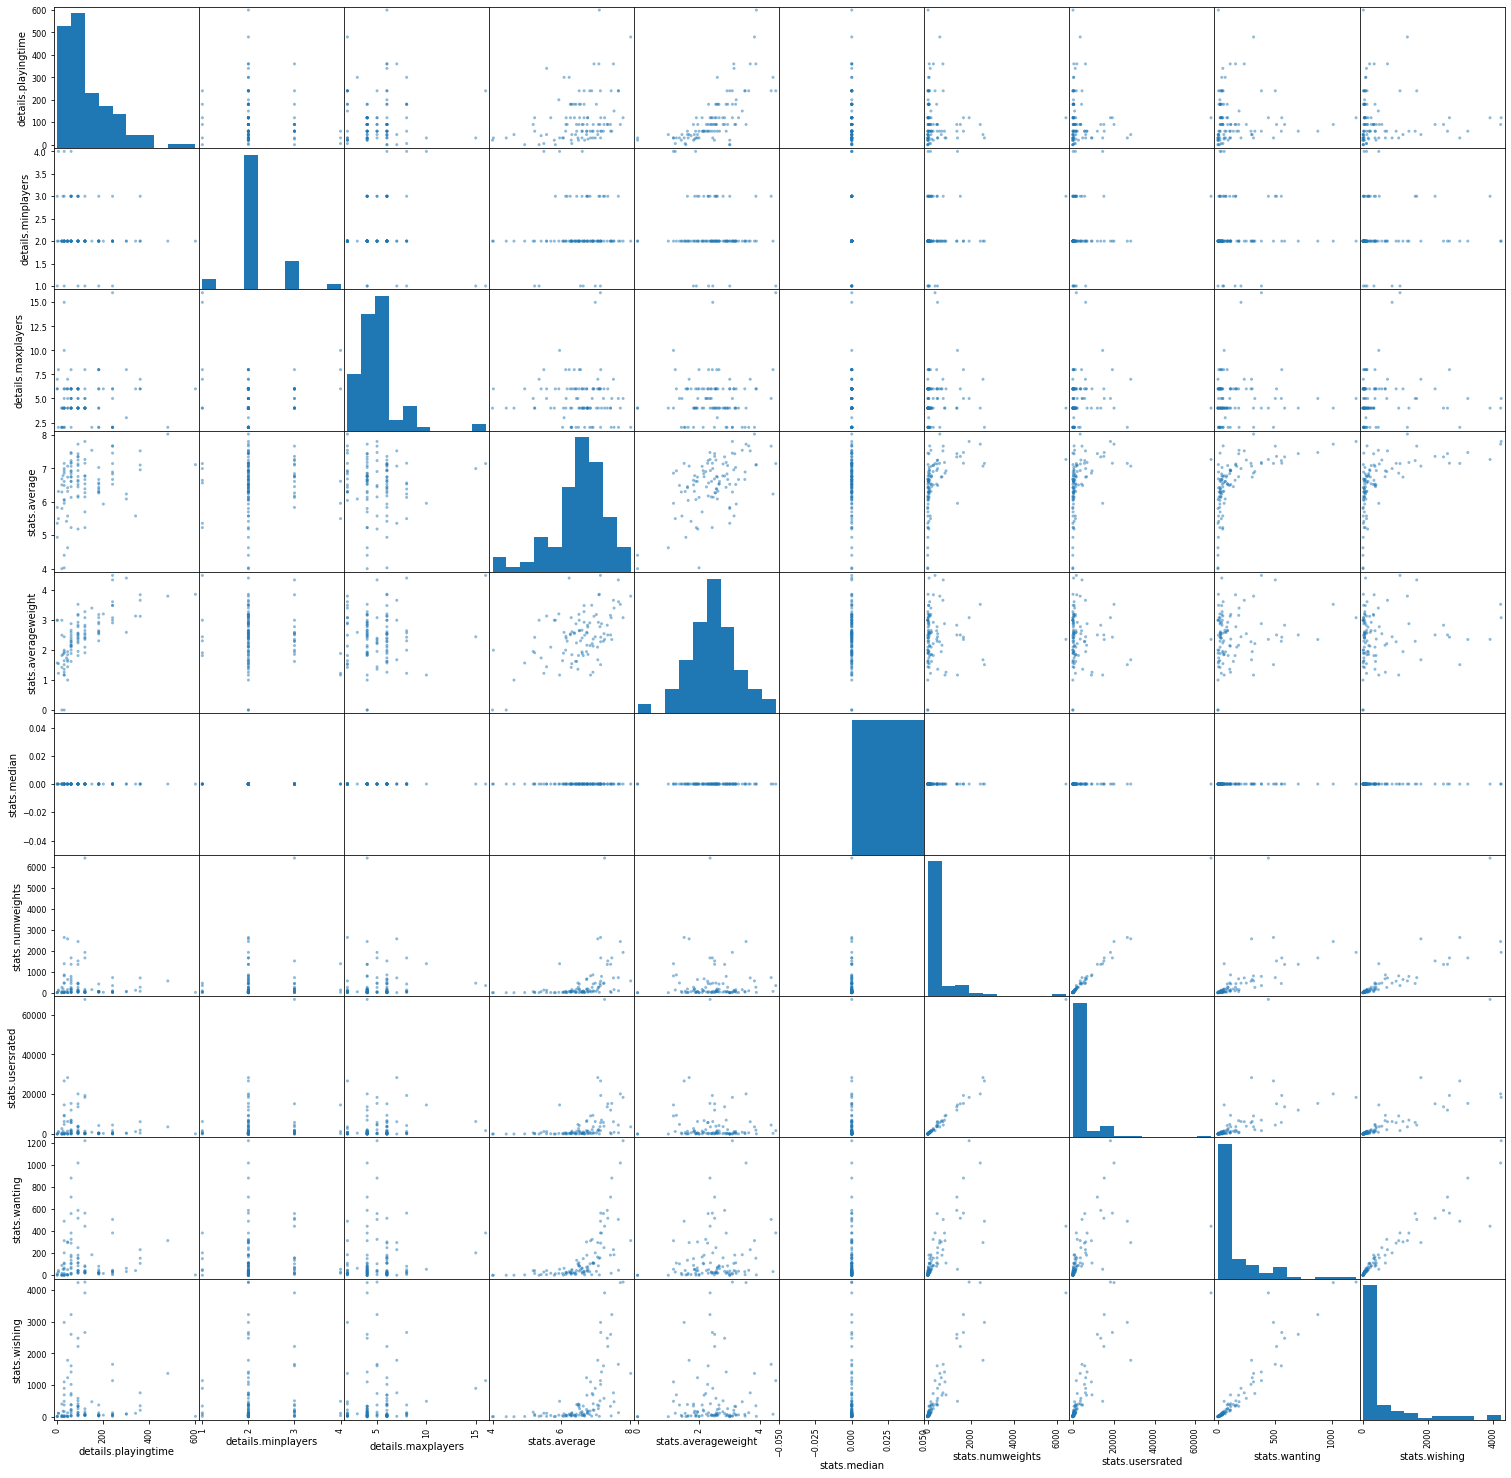

In [15]:
scatter_matrix(graph100, figsize=(26,26));
plt.savefig('img/scatter.png')

In [3]:
import string
import unicodedata
import numpy as np
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

### EDA using TF-IDF Vectorizer and Clustering using kMeans

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='unicode')
X = vectorizer.fit_transform(first100words['details.description'].values.astype('U'))

In [ ]:
#preprocess text more - lemmitizer 
#look at common words

In [12]:
X

<100x2855 sparse matrix of type '<class 'numpy.float64'>'
	with 6838 stored elements in Compressed Sparse Row format>

In [140]:
def print_features(vectorizer, kmeans):
    features = vectorizer.get_feature_names()
    top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
    print("top features (words) for each cluster:")
    for num, centroid in enumerate(top_centroids):
        print(f"{num}, {', '.join(features[i] for i in centroid)}")

In [156]:
kmeans

KMeans()

In [154]:
maxk = 10
wcss = np.zeros(maxk)
kmeans = KMeans(maxk)
kmeans.fit(X)
print_features(vectorizer, kmeans)

# y = kmmeans.predict(X)
  
# for c in range(0, maxk):
#     for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
#         wcss[k] += sum(x[i1] - x[i2])**2
# wcss[k] /= 2

#not sure how to do this for words??



top features (words) for each cluster:
0, 10, beer, buffalo, fossil, chocolate, players, sales, contracts, produce, oil
1, blocks, war, games, strength, units, block, 10, way, columbia, steps
2, 10, game, players, quot, cards, player, war, tiles, pieces, board
3, civilization, 10, civilizations, game, followers, players, ziggurat, cards, condottiere, leaders
4, region, party, land, regions, 10, king, caballeros, victory, wall, place
5, trick, stock, 10, suits, player, winner, scoring, airlines, acquire, suit
6, dice, column, roll, 10, advance, room, character, weapons, player, treasure
7, cards, 10, card, order, quot, player, points, hand, players, game


In [158]:
maxk = 12
wcss = np.zeros(maxk)
kmeans = KMeans(maxk)
kmeans.fit(X)
print_features(vectorizer, kmeans)

top features (words) for each cluster:
0, 10, cards, tiles, party, tile, players, resource, businesses, catan, victory
1, blocks, war, games, strength, units, block, 10, way, columbia, steps
2, 10, game, players, civilization, war, cards, quot, card, beer, play
3, 10, cards, quot, players, points, bid, player, order, knizia, type
4, trick, card, 10, cards, player, suits, taking, expedition, played, quot
5, 10, game, players, player, quot, twilight, metal, pieces, imperium, board
6, robot, robots, moves, puzzle, factory, target, 10, movement, cards, boards
7, monsters, magic, weapons, room, treasure, characters, new, realm, 10, natives
8, explore, region, conquer, control, regions, land, 10, caballeros, areas, 4x
9, buildings, building, 10, city, acquire, town, game, bonuses, produce, placing
10, dice, roll, column, turn, player, 10, advance, spokes, fare, hubs
11, disk, abstract, completely, nature, combinations, placement, create, scoring, different, 10


In [159]:
maxk = 15
wcss = np.zeros(maxk)
kmeans = KMeans(maxk)
kmeans.fit(X)
print_features(vectorizer, kmeans)

top features (words) for each cluster:
0, 10, cards, tiles, tile, edition, businesses, catan, players, transport, building
1, dice, roll, column, turn, player, 10, advance, spokes, fare, hubs
2, blocks, war, games, strength, units, block, 10, way, columbia, steps
3, party, victory, game, parties, regional, points, zimmer, mixing, chanting, psychic
4, 10, empire, fantasy, federation, world, monsters, realm, game, magic, weapons
5, robot, robots, buffalo, player, pieces, moves, 10, buildings, territory, square
6, beer, actions, knights, attempting, 10, torres, markets, wall, players, castles
7, 10, twilight, imperium, borderlands, elements, catan, settlers, diplomacy, reimplemented, resource
8, 10, quot, cards, game, player, players, card, points, round, order
9, civilization, 10, civilizations, followers, ziggurat, players, game, points, euphrates, tigris
10, disk, abstract, completely, nature, combinations, placement, create, scoring, different, 10
11, explore, conquer, land, villages,

In [165]:
first100words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   details.name         100 non-null    object
 1   details.description  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


### EDA with PCA

In [183]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(first100num)
X_scaled

array([[-4.38112159e-03,  1.16640305e+00,  1.41312663e+00, ...,
         7.47826663e-02,  1.60705864e+00,  1.17412934e+00],
       [-4.42493280e-01, -8.09753789e-01,  4.21458818e-01, ...,
        -3.93832994e-01, -3.63798659e-01, -4.10968095e-01],
       [-4.42493280e-01, -5.27445670e-01, -5.70208989e-01, ...,
         9.51513607e-01,  2.51599283e+00,  2.17954613e+00],
       ...,
       [-4.38112159e-03,  3.71705690e-02,  4.21458818e-01, ...,
         1.69803467e+00,  4.80632699e+00,  3.93345166e+00],
       [ 4.33731037e-01, -6.68599729e-01,  4.21458818e-01, ...,
        -4.41393987e-01, -6.38278785e-01, -5.70221018e-01],
       [ 4.33731037e-01, -2.45137550e-01,  4.21458818e-01, ...,
         8.80344644e-03,  4.59641719e-01,  3.38784053e-02]])

In [195]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

print(pca.get_covariance().shape)
print(pca.components_.shape)

(19, 19)
(10, 19)


In [184]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the scree plot.
      
    title: str
      A title for the scree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                    (ind[i]+0.2, vals[i]+0.005), 
                    va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

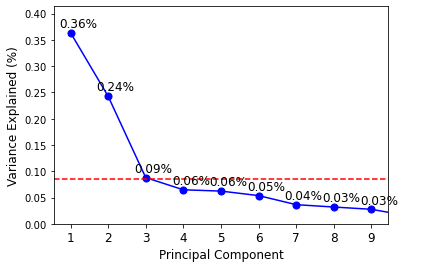

In [196]:
fig, ax = plt.subplots()
scree_plot(ax, pca)
ax.axhline(y=0.085, color='r', linestyle='--')

> 3 principal components / clusters is the best

### EDA: SVD

In [179]:
from numpy.linalg import svd

mat = first100num.values
names = first100words['details.name']

# Compute SVD
U, sigma, VT = svd(mat)

# do 3 topics...for now 
k = 7
topics = ['latent_topic_{}'.format(i) for i in range(k)]

# Keep top k concepts for comparison
U = U[:,:k]
sigma = sigma[:k]
VT = VT[:k,:]

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index = names)
VT = pd.DataFrame(VT, index = topics, columns = first100num.columns)

# print('\nMatrix U: ')
# print(U)
print('\nMatrix S: ')
print(sigma)
print('\nMatrix V: ')
print(VT)


Matrix S: 
[157809.53  18733.15  10903.64   2976.9    2635.02   1641.4     587.03]

Matrix V: 
                details.maxplayers  details.maxplaytime  details.minage  \
latent_topic_0               -0.00                -0.00           -0.00   
latent_topic_1               -0.00                -0.06           -0.01   
latent_topic_2               -0.00                -0.03           -0.00   
latent_topic_3                0.00                -0.17           -0.00   
latent_topic_4               -0.00                -0.01           -0.00   
latent_topic_5               -0.00                -0.55           -0.00   
latent_topic_6               -0.01                -0.06           -0.00   

                details.minplayers  details.minplaytime  details.playingtime  \
latent_topic_0                -0.0                -0.00                -0.00   
latent_topic_1                -0.0                -0.06                -0.06   
latent_topic_2                -0.0                -0.03        

Index(['details.maxplayers', 'details.maxplaytime', 'details.minage',
       'details.minplayers', 'details.minplaytime', 'details.playingtime',
       'details.yearpublished', 'stats.average', 'stats.averageweight',
       'stats.bayesaverage', 'stats.median', 'stats.numcomments',
       'stats.numweights', 'stats.owned', 'stats.stddev', 'stats.trading',
       'stats.usersrated', 'stats.wanting', 'stats.wishing'],
      dtype='object')

/home/zy/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zy/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zy/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zy/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zy/anaconda3/lib/python3.7/site-packag

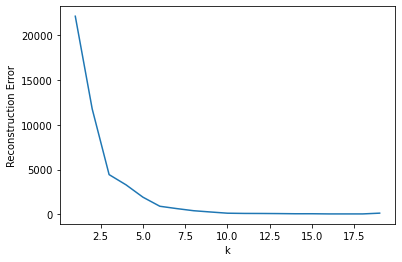

In [174]:
from sklearn.decomposition import NMF

def fit_nmf(k):
    nmf = NMF(n_components=k)
    nmf.fit(mat)
    W = nmf.transform(mat);
    H = nmf.components_;
    return nmf.reconstruction_err_

n_comp = 20
error = [fit_nmf(i) for i in range(1,n_comp)];
plt.plot(range(1,n_comp), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error');

In [180]:
# Compute SVD
U, sigma, VT = svd(mat)

# do 3 topics...for now 
k = 6
topics = ['latent_topic_{}'.format(i) for i in range(k)]

# Keep top k concepts for comparison
U = U[:,:k]
sigma = sigma[:k]
VT = VT[:k,:]

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index = names)
VT = pd.DataFrame(VT, index = topics, columns = first100num.columns)

# print('\nMatrix U: ')
# print(U)
print('\nMatrix S: ')
print(sigma)
print('\nMatrix V: ')
print(VT)


Matrix S: 
[157809.53  18733.15  10903.64   2976.9    2635.02   1641.4 ]

Matrix V: 
                details.maxplayers  details.maxplaytime  details.minage  \
latent_topic_0                -0.0                -0.00           -0.00   
latent_topic_1                -0.0                -0.06           -0.01   
latent_topic_2                -0.0                -0.03           -0.00   
latent_topic_3                 0.0                -0.17           -0.00   
latent_topic_4                -0.0                -0.01           -0.00   
latent_topic_5                -0.0                -0.55           -0.00   

                details.minplayers  details.minplaytime  details.playingtime  \
latent_topic_0                -0.0                -0.00                -0.00   
latent_topic_1                -0.0                -0.06                -0.06   
latent_topic_2                -0.0                -0.03                -0.03   
latent_topic_3                 0.0                -0.17             

> ## What do I do now?
* study for mock interview first

* re-watch lectures to understand nlp / svd / pca more

* Run cleaning on entire data set, export to CSV so it can be uploaded to git (currently above 50MB limit)
* Run PCA and Reconstruction error and see if it is still k=3 optimal
* Find out how to classify these latent topics and how to read
* How to put everything to positive?

    
* preprocess text more
* plot using ron's notes